In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas.util.testing as tm


/var/folders/jr/46383smx4pv_y4ygtqxh5jb00000gn/T/ipykernel_34419/613549884.py:8: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 676.5 kB/s eta 0:00:00a 0:00:01


In [3]:
df = pd.read_csv("DJIATable.csv")
df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [4]:
df=df.iloc[::-1]
df

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [5]:
df.index=df.Date
df

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2008-08-08,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
2016-06-27,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
2016-06-28,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-29,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


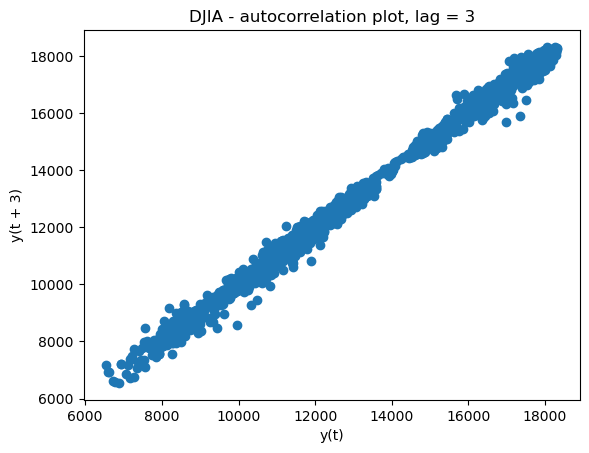

In [6]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('DJIA - autocorrelation plot, lag = 3')
plt.show()

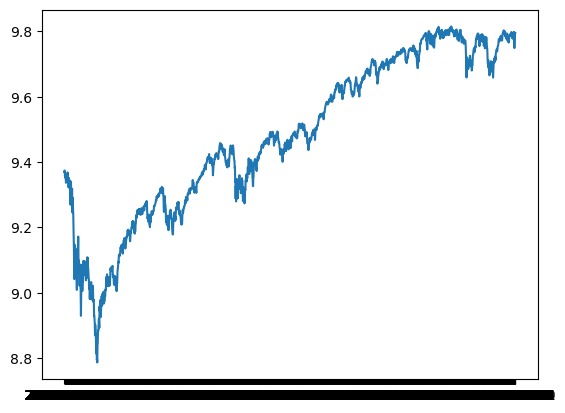

In [7]:
ts_log = np.log(df["Close"])
plt.plot(ts_log)

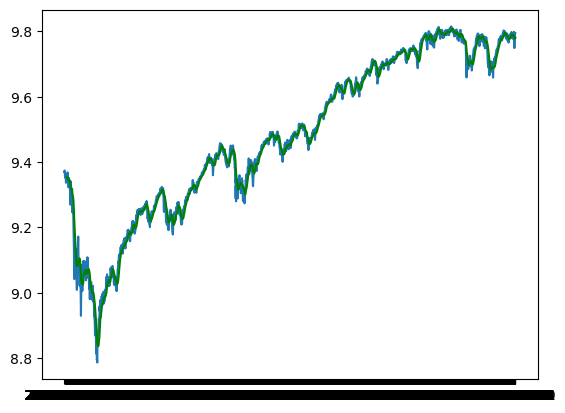

In [8]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='green')

In [9]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(20)

Date
2008-08-08         NaN
2008-08-11         NaN
2008-08-12         NaN
2008-08-13         NaN
2008-08-14         NaN
2008-08-15         NaN
2008-08-18         NaN
2008-08-19         NaN
2008-08-20         NaN
2008-08-21         NaN
2008-08-22         NaN
2008-08-25   -0.014626
2008-08-26   -0.009976
2008-08-27   -0.000150
2008-08-28    0.017652
2008-08-29    0.002849
2008-09-02    0.001217
2008-09-03    0.003515
2008-09-04   -0.024684
2008-09-05   -0.020821
Name: Close, dtype: float64

In [10]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).mean()

    orig = plt.plot(timeseries, color='blue',label='original')
    mean = plt.plot(rolmean, color='red', label='rolling mean')
    std = plt.plot(rolstd, color='black', label = 'rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean and standard deviation')
    plt.show(block=False)

    print('results of dickey-fuller test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test value','p-value','#lags used','number of observations'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%)'%key] = value
    print(dfoutput)    

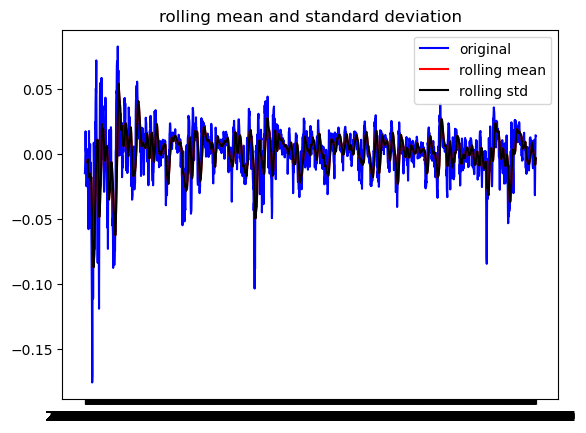

results of dickey-fuller test:


ValueError: unsupported format character ')' (0x29) at index 17

In [11]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)